# Pandas bevezető

Ez a bevezető az Üzleti Intelligencia tárgy laborjához készült. A pandas könyvtárhoz kívánok egy rövid bevezetőt nyújtani. Az anyag folyamatosan bővül.

Angol nyelven kiváló erőforrásokat találhatsz:

1. A hivatalos dokumentációhoz tartozó rövid bevezető: http://pandas.pydata.org/pandas-docs/stable/10min.html
2. Brandon Rhodes tutorialja a 2015-ös Pyconon (kicsit hosszabb, de megéri): https://www.youtube.com/watch?v=5JnMutdy6Fw

# Mi az a pandas?

A pandas egy adatkezelő függvénykönyvtár, amit a Data Scientistek nagyon szeretnek. Az adatokat táblázatos formában kezeli. A táblázatoknak van fejlécük és indexük. Heterogén adatokat tárolhatunk: szöveges, számadat, igazságérték, dátum stb.

A pandas remekül együttműködik a Python gépi tanuló könyvtárával (scikit-learn) és a legelterjedtebb vizualizációs könyvtárakkal (matplotlib, seaborn).

In [1]:
import pandas as pd  # konvenció szerint pd aliast használunk
%matplotlib inline
import matplotlib
import numpy as np

# tegyük szebbé a grafikonokat
matplotlib.style.use('ggplot')
matplotlib.pyplot.rcParams['figure.figsize'] = (15, 3)
matplotlib.pyplot.rcParams['font.family'] = 'sans-serif'

In [2]:
grades = pd.DataFrame(
    {
        'subject': ['analízis 1', 'digitális technika 1', 
                    'fizika 1', 'mikmak', 'programozás alapjai 1', 'szoftvertechonológia'],
        'grade': [3, 4, 3, 2, 5, 1],
        'teacher': ['a', 'b', 'a', 'c', 'd', 'd'],
        'semester': [1, 1, 2, 2, 1, 3],
    }
)
grades

,grade,semester,subject,teacher
0,3,1,analízis 1,a
1,4,1,digitális technika 1,b
2,3,2,fizika 1,a
3,2,2,mikmak,c
4,5,1,programozás alapjai 1,d
5,1,3,szoftvertechonológia,d


A DataFrame elejét a .head függvénnyel, a végét a .tail-lel nézhetjük meg. Ennek akkor van jelentősége, ha nagy táblázatokkal dolgozunk.

In [3]:
grades.head()

,grade,semester,subject,teacher
0,3,1,analízis 1,a
1,4,1,digitális technika 1,b
2,3,2,fizika 1,a
3,2,2,mikmak,c
4,5,1,programozás alapjai 1,d


# Egyszerű navigálás a DataFrame-ben

A táblázat első oszlopa kitüntetett, ez a DataFrame indexe, ezzel tudjuk azonosítani a sorokat. Ugyan nem követelmény, hogy unikus legyen, de praktikus unikusra választani. Egynél több oszlopot is használhatunk indexként (multiindex).

## Oszlopok kiválasztása

Lekérhetünk csak bizonyos oszlopokat, ekkor egy új DataFrame-et kapunk, ami a választott oszlopokat tartalmazza csak:

In [4]:
grades[['grade', 'teacher']]

,grade,teacher
0,3,a
1,4,b
2,3,a
3,2,c
4,5,d
5,1,d


vagy indexelve az oszlopokat:

In [5]:
grades[[0, 3]]

,grade,teacher
0,3,a
1,4,b
2,3,a
3,2,c
4,5,d
5,1,d


In [6]:
grades[list(range(3))]  # 0,1,2-es oszlopok

,grade,semester,subject
0,3,1,analízis 1
1,4,1,digitális technika 1
2,3,2,fizika 1
3,2,2,mikmak
4,5,1,programozás alapjai 1
5,1,3,szoftvertechonológia


## Sorok kiválasztása

A sorokat többféleképpen indexelhetjük:
1. index szerint
2. sorszám szerint

Mielőtt index szerint kérdeznénk le egy sort, állítsuk át az indexet valami beszédesebbre.


In [7]:
grades = grades.set_index('subject')
grades

,grade,semester,teacher
subject,,,
analízis 1,3,1,a
digitális technika 1,4,1,b
fizika 1,3,2,a
mikmak,2,2,c
programozás alapjai 1,5,1,d
szoftvertechonológia,1,3,d


In [8]:
grades.loc['fizika 1']  # a loc után [] kell!

grade       3
semester    2
teacher     a
Name: fizika 1, dtype: object

A kapott sor nem tűnik DataFrame-nek és valóban nem az:

In [9]:
type(grades.loc['fizika 1'])

pandas.core.series.Series

A Series egy egydimenziós adatsor, gondolhatunk rá úgy, mint a DataFrame egy sorára.

## Indexelés sor szerint

In [10]:
grades.iloc[1:3]  # utolsó index nincs benne, [1, 3)

,grade,semester,teacher
subject,,,
digitális technika 1,4,1,b
fizika 1,3,2,a


# Szűrés

A DataFrame-ek sorain egyszerre végezhetünk műveleteket:

In [11]:
grades.semester == 1

subject
analízis 1                True
digitális technika 1      True
fizika 1                 False
mikmak                   False
programozás alapjai 1     True
szoftvertechonológia     False
Name: semester, dtype: bool

Ekkor azokra a sorokra kapunk True-t, ahol igaz a feltétel. A feltételek kombinálhatóak, a zárójelezésre figyelni kell:

In [12]:
(grades.semester == 1) & (grades.teacher == 'a')

subject
analízis 1                True
digitális technika 1     False
fizika 1                 False
mikmak                   False
programozás alapjai 1    False
szoftvertechonológia     False
dtype: bool

Az igazságértékek sorozatával pedig szűrhetjük a DataFrame-eket:

In [13]:
grades[grades.semester==1]

,grade,semester,teacher
subject,,,
analízis 1,3,1,a
digitális technika 1,4,1,b
programozás alapjai 1,5,1,d


In [14]:
grades[(grades.semester == 1) & (grades.teacher == 'a')]

,grade,semester,teacher
subject,,,
analízis 1,3,1,a


# Vektoros műveletvégzés

A pandas DataFrame-jeire és Series-eire az aritmetikai operátorok túl vannak terhelve, ezért egyszerre végezhetünk az egész táblán műveleteket.

In [15]:
grades[['grade', 'semester']] + 15

,grade,semester
subject,,
analízis 1,18,16
digitális technika 1,19,16
fizika 1,18,17
mikmak,17,17
programozás alapjai 1,20,16
szoftvertechonológia,16,18


## Az index is hasonlóan manipulálható 

In [16]:
grades.index.str.upper()

Index(['ANALÍZIS 1', 'DIGITÁLIS TECHNIKA 1', 'FIZIKA 1', 'MIKMAK',
       'PROGRAMOZÁS ALAPJAI 1', 'SZOFTVERTECHONOLÓGIA'],
      dtype='object', name='subject')

Át is állítható:

In [17]:
grades.index = grades.index.str.upper()
grades

,grade,semester,teacher
subject,,,
ANALÍZIS 1,3,1,a
DIGITÁLIS TECHNIKA 1,4,1,b
FIZIKA 1,3,2,a
MIKMAK,2,2,c
PROGRAMOZÁS ALAPJAI 1,5,1,d
SZOFTVERTECHONOLÓGIA,1,3,d


Majd visszaállítható:

In [18]:
grades.index = grades.index.str.lower()
grades

,grade,semester,teacher
subject,,,
analízis 1,3,1,a
digitális technika 1,4,1,b
fizika 1,3,2,a
mikmak,2,2,c
programozás alapjai 1,5,1,d
szoftvertechonológia,1,3,d


# Több DataFrame kezelése, merge

In [19]:
grades.index

Index(['analízis 1', 'digitális technika 1', 'fizika 1', 'mikmak',
       'programozás alapjai 1', 'szoftvertechonológia'],
      dtype='object', name='subject')

In [20]:
credits = pd.DataFrame(
    {
        'subject': ['analízis 1', 'fizika 1', 'programozás alapjai 2'],
        'credit': [7, 5, 5]
    }
)
credits

,credit,subject
0,7,analízis 1
1,5,fizika 1
2,5,programozás alapjai 2


## Hány kreditet érnek a tárgyak, amikre jegyet kaptunk?

In [21]:
d = grades.merge(credits, left_index=True, right_on='subject', how='outer')

d

,grade,semester,teacher,credit,subject
0,3,1,a,7,analízis 1
2,4,1,b,NaN,digitális technika 1
1,3,2,a,5,fizika 1
2,2,2,c,NaN,mikmak
2,5,1,d,NaN,programozás alapjai 1
2,1,3,d,NaN,szoftvertechonológia
2,NaN,NaN,NaN,5,programozás alapjai 2


A paraméterek magyarázata:
1. left_index: a baloldali DataFrame (grades ebben az esetben) indexe mentén joinoljon.
2. right_on: a jobboldali DataFrame (credits) subject mezője mentén joinoljon.
3. how: inner/outer. Egyezik az SQL-es joinnal.

A joinolni kívánt mező kétféle lehet:
1. index: ekkor az indexként használt oszlopot próbálja a másik táblázattal joinolni. left_index=True-ra kell állítani.
2. nem index: egy vagy több nem indexként használt oszlop mentén próbál meg joinolni. left_on=col1 vagy left_on=[col1, col2]

## Érvénytelen adatok eldobása 

Látható, hogy nem minden tárgyhoz sikerült megtalálni a kreditszámot, hiszen nem mindegyik szerepelt a credits táblában.

A pandas NaN (not a number) tölti fel a hiányzó mezőket. Szerencsére a legtöbb műveletnek megmondhatjuk, hogy hogyan bánjon a NaN-okkal. Meg is szabadulhatunk tőlük:

In [22]:
d = d.dropna()
d

,grade,semester,teacher,credit,subject
0,3,1,a,7,analízis 1
1,3,2,a,5,fizika 1


# Szélsőérték-keresés (max, idxmax, argmax)

Sokszor vagyunk kíváncsiak arra, hogy mi egy oszlop maximuma/minimuma vagy éppen hol veszi fel ezt az értéket (argmax). A pandas tartalmaz erre beépített függvényeket.

## DataFrame-re

Melyik tárgyból kaptuk a legjobb jegyet?

In [23]:
print(type(grades.max()))
grades.max()

<class 'pandas.core.series.Series'>


grade       5
semester    3
teacher     d
dtype: object

A `max` függvény egy Series-zel tér vissza, ami minden oszlop maximumát tartalmazza. Sorokra is felthetjük ugyanezt a kérdést, bár erre az adatra nem sok értelme van:

In [24]:
grades.max(axis=1)

subject
analízis 1               3
digitális technika 1     4
fizika 1                 3
mikmak                   2
programozás alapjai 1    5
szoftvertechonológia     3
dtype: int64

Hol veszi fel a maximumát?

In [25]:
# grades.idxmax()  # hibát kapunk, mert az egyik oszlop szöveges
grades[['grade', 'semester']].idxmax()

grade       programozás alapjai 1
semester     szoftvertechonológia
dtype: object

A számadatot tartalmazó oszlopok közül megkaptuk, hogy melyik sornál veszi fel a maximális értéket. Holtverseny esetén a legelső előfordulást adja vissza.

## Series-re

Series esetén egyszerűbb a dolgunk, a `max` és az `argmax` függvényeket használhatjuk.

In [26]:
grades.grade.max(), grades.grade.argmax()

(5, 'programozás alapjai 1')

# Csoportosítás (groupby)

A groupby függvénnyel tetszőleges oszlop mentén csoportosíthatjuk a DataFrame-et.

In [27]:
g = credits.groupby('credit')

In [28]:
g.groups

{5: [1, 2], 7: [0]}

Nem csak oszlop szerint tudunk csoportosítani, hanem tetszőleges kifejezés szerint.

In [29]:
credits.credit % 2

0    1
1    1
2    1
Name: credit, dtype: int64

Eszerint groupby:

In [30]:
credits.groupby(credits.credit % 2)

Csoportonként végezhetünk műveleteket:

In [31]:
g.count()

,subject
credit,
5,2
7,1


# Vizualizáció (plot)

A matplotlib modullal együttműködve rengeteg vizualizációs lehetőségünk van.

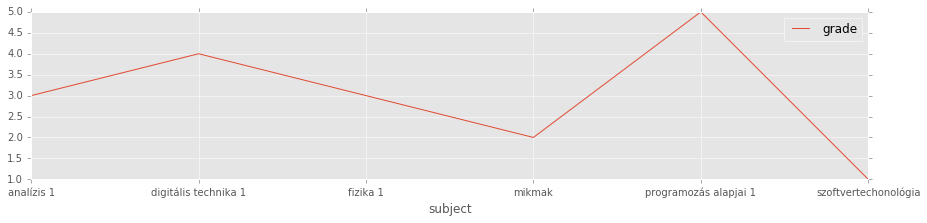

In [32]:
grades.plot(y='grade')

Az oszlopdiagramnak több értelme lenne:

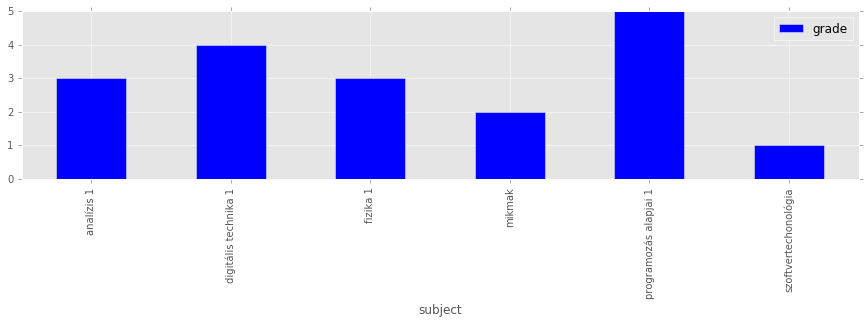

In [33]:
grades.plot(y='grade', kind='bar')

Nem adtuk meg az x tengelyt, ekkor automatikusan a DataFrame indexét használja, ami ebben az esetben a tárgyakat jelenti.

Ábrázolhatnánk félév szerint is egy scatter ploton.

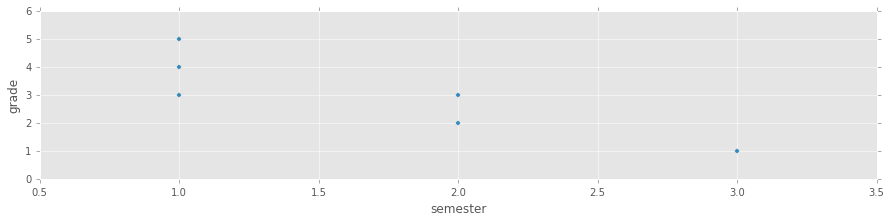

In [34]:
grades.plot(x='semester', y='grade', kind='scatter')

## Amire érdemes figyelni (GOTCHAs)

### Minden művelet új DataFrame-et ad vissza

Minden művelet egy új DataFrame-mel tér vissza, nem módosítja a paramétereit. Ezt el kell tárolnunk, ha használni akarjuk.

### Egy cellában az utolsó kifejezés visszatérési értéke kiíródik, de a többi nem

Ha a többit is szeretnénk kiírni, használjuk a print függvényt.